In [6]:
import cv2
from os import listdir
from os.path import join, isfile
import numpy as np
import sys
from matplotlib import pyplot as plt

print(cv2.__version__)

base_dir = 'C:/Users/rmauro/source/repos/NN-Tensorflow/assets'
cascade = join(base_dir, 'haarcascades/haarcascade_frontalface_default.xml')
labels = ["sheldon", "leonard", "peny", "raj"]
region=(300,200, 650, 400)

4.1.1


In [7]:
#based on https://github.com/grantas33/Google-dinosaur-with-OpenCV

# Done by Frannecklp

import cv2
import numpy as np
import win32gui, win32ui, win32con, win32api
import pyautogui

def grab_screen(region=None):

    hwin = win32gui.GetDesktopWindow()

    if region:
        left,top,x2,y2 = region
        width = x2 - left + 1
        height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
    
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)

    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwin, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())

    return cv2.cvtColor(img, 1)

In [8]:
cascade

'C:/Users/rmauro/source/repos/NN-Tensorflow/assets\\haarcascades/haarcascade_frontalface_default.xml'

In [9]:
faceCascade = cv2.CascadeClassifier(cascade)

while True:
    #frame = grab_screen(region=(75,250, 750, 450))
    frame = grab_screen(region)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
       
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
cv2.destroyAllWindows()

c:\users\rmauro\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [10]:
#this is to capture pictures to train

cap_type = "sheldon"
#video_capture = cv2.VideoCapture(1)

frame_rate = 30
frame_count = 0

while True:
    frame = grab_screen(region)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    X = 0
    X2 = 10
    Y = 0
    Y2 = 10
    
    for (x, y, w, h) in faces:
        file_name = "faces" + str(frame_count) + ".jpg"
        full_path = join(base_dir, cap_type, file_name)
        #print(full_path)
        
        cropped = frame[y:y+h, x:x+w]
        
        cv2.imwrite(full_path, cropped)
        
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        X = x
        Y = y
        X2 = x + w
        Y2 = y + h
        break
       
    cropped = frame[Y:Y2, X:X2]
    cv2.imshow("cropped", cropped)
        
    cv2.imshow('video', frame)
    
    frame_count += 1
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
#video_capture.release()
cv2.destroyAllWindows()

c:\users\rmauro\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


let's try make predictions on this

In [11]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [18]:
samples_base_dir = join(base_dir)
classes = ["howard", "leonard", "penny", "raj", "sheldon", "amy", "prya", "rajs_father", "shelly_friends", "shelly_mom", "stuart"]
#labels.index("closed-eyes")

In [19]:
def getData(search_dir, labels):
    print(listdir(search_dir))

    X = []
    y = []

    width = 75
    height = 75

    for dirLabels in listdir(search_dir):
        full_path_label = join(search_dir, dirLabels)
        print(full_path_label)
        
        for label_dir in listdir(full_path_label):
            full_path_label_item = join(full_path_label, label_dir)

            if(isfile(full_path_label_item)):
                try:
                    img = cv2.imread(full_path_label_item, 1)
                    resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
                except:
                    pass
                
                X.append(resized)
                y.append(labels.index(str(dirLabels)))
                #print('resized dimensions: ', resized.shape)
            
                #cv2.imshow('resized', resized)
                #cv2.waitKey(0)
                #cv2.destroyAllWindows()
                #break
        
    
    return X, y

In [22]:
listdir(join(base_dir,"faces"))

['amy',
 'howard',
 'leonard',
 'penny',
 'prya',
 'raj',
 'rajs_father',
 'sheldon',
 'shelly_friends',
 'shelly_mom',
 'stuart']

In [23]:
samples_dir = join(base_dir, "faces")
data, labels = getData(samples_dir, classes)
print(labels[:10])

['amy', 'howard', 'leonard', 'penny', 'prya', 'raj', 'rajs_father', 'sheldon', 'shelly_friends', 'shelly_mom', 'stuart']
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\amy
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\howard
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\leonard
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\penny
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\prya
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\raj
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\rajs_father
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\sheldon
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\shelly_friends
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\shelly_mom
C:/Users/rmauro/source/repos/NN-Tensorflow/assets\faces\stuart
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [24]:
data = np.asarray(data)
labels = np.asarray(labels)

In [25]:
print('labels ', labels.shape)
print('data ', data.shape)

labels  (5277,)
data  (5277, 75, 75, 3)


In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [27]:
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:400], indices[400:]

In [28]:
indices

array([3469, 4442, 4228, ..., 4322, 4770, 2614])

In [29]:
test_images, train_images = data[training_idx,:], data[test_idx,:]
test_labels, train_labels = labels[training_idx], labels[test_idx]
print('train_images ', train_images.shape)
print('train_labels ', train_labels.shape)
print('test_images ', test_images.shape)
print('test_labels ', test_labels.shape)

train_images  (4877, 75, 75, 3)
train_labels  (4877,)
test_images  (400, 75, 75, 3)
test_labels  (400,)


['howard', 'leonard', 'penny', 'raj', 'sheldon', 'amy', 'prya', 'rajs_father', 'shelly_friends', 'shelly_mom', 'stuart']


Text(0.5, 0, 'penny')

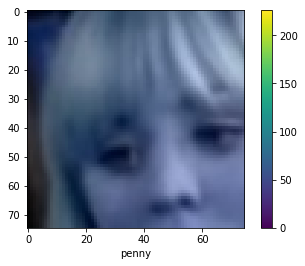

In [30]:
#class_names = ["hellen", "hellen2", "player", "sheldon", "teddy"]
print(classes)

plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.xlabel(classes[train_labels[4]])

In [31]:
#normalization step... can only run once
train_images = train_images / 255.0
test_images = test_images / 255.0

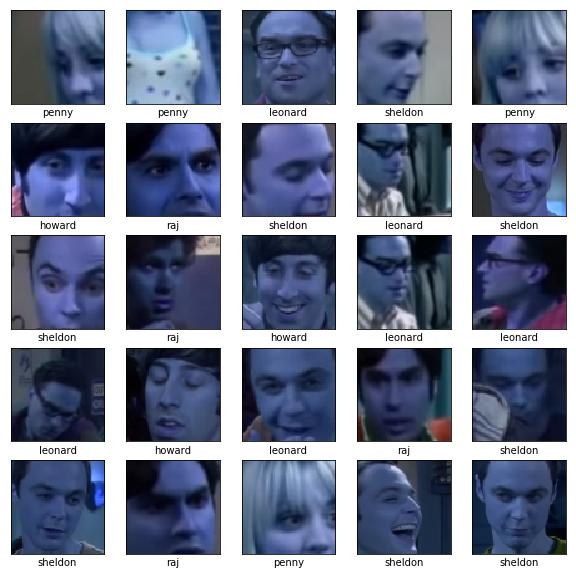

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

In [33]:
print("Number of train data - " + str(len(train_images)))
print("Number of test data - " + str(len(test_images)))
print("shapes ", train_images[0].shape)

Number of train data - 4877
Number of test data - 400
shapes  (75, 75, 3)


In [34]:
#conv2d works with 3 dimensions array

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 75, 75
#train_images = train_images.reshape(train_images.shape[0], w, h, 1)
#test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, len(classes))
test_labels = tf.keras.utils.to_categorical(test_labels, len(classes))

# Print training set shape
print("x_train shape:", train_images.shape, "y_train shape:", test_images.shape)

# Print the number of training, validation, and test datasets
print(train_images.shape[0], 'train set')
print(test_images.shape[0], 'test set')
print(test_images[0].shape, 'test shape')
print('classes len ', len(classes))

x_train shape: (4877, 75, 75, 3) y_train shape: (400, 75, 75, 3)
4877 train set
400 test set
(75, 75, 3) test shape
classes len  11


In [35]:
#defining our neural network

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(75,75,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(11, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

In [37]:
#compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
#our file name of best weights - extensions ckpt or h5
file_model_name='faces.weights.best.h5'

#this will make save the results at every epoch
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=file_model_name, verbose = 1, save_best_only=True)

In [39]:
model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10,
         validation_data=(test_images, test_labels),
         callbacks=[checkpointer])

Train on 4877 samples, validate on 400 samples
Epoch 1/10
4864/4877 [============================>.] - ETA: 0s - loss: 1.2114 - accuracy: 0.5720
Epoch 00001: val_loss improved from inf to 0.78200, saving model to faces.weights.best.h5
4877/4877 [==============================] - 35s 7ms/sample - loss: 1.2100 - accuracy: 0.5721 - val_loss: 0.7820 - val_accuracy: 0.7950
Epoch 2/10
4864/4877 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.8380
Epoch 00002: val_loss improved from 0.78200 to 0.38810, saving model to faces.weights.best.h5
4877/4877 [==============================] - 35s 7ms/sample - loss: 0.5214 - accuracy: 0.8382 - val_loss: 0.3881 - val_accuracy: 0.9025
Epoch 3/10
4864/4877 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.9065
Epoch 00003: val_loss improved from 0.38810 to 0.28635, saving model to faces.weights.best.h5
4877/4877 [==============================] - 35s 7ms/sample - loss: 0.3195 - accuracy: 0.9063 - val_loss: 0.2

In [40]:
# Load the weights with the best validation accuracy
model.load_weights(file_model_name)

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

400/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.9875


In [42]:
predictions = model.predict(test_images)
print('predict', np.argmax(predictions[0]))
print('test label', test_labels[0])


predict 3
test label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


(75, 75, 3)
is this raj?


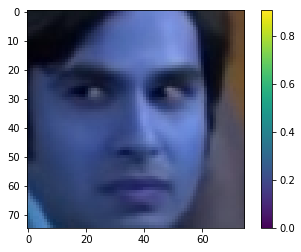

In [43]:
#reshape back to two dimensions
im = test_images[0]
#im = im.reshape(75, 75)
print(im.shape)
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.grid(False)

print('is this {}?'.format(classes[np.argmax(predictions[0])]))

In [44]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]#.reshape(75,75)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    #print('predicted_label ', predicted_label)
    #print('true_label ', true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(11), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [45]:
print(np.argmax(predictions[0]))
print(test_labels[0])
print(classes)
print(classes[np.argmax(test_labels[0])])
print(test_images[i].shape)#.reshape(75,75).shape)

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['howard', 'leonard', 'penny', 'raj', 'sheldon', 'amy', 'prya', 'rajs_father', 'shelly_friends', 'shelly_mom', 'stuart']
raj
(75, 75, 3)


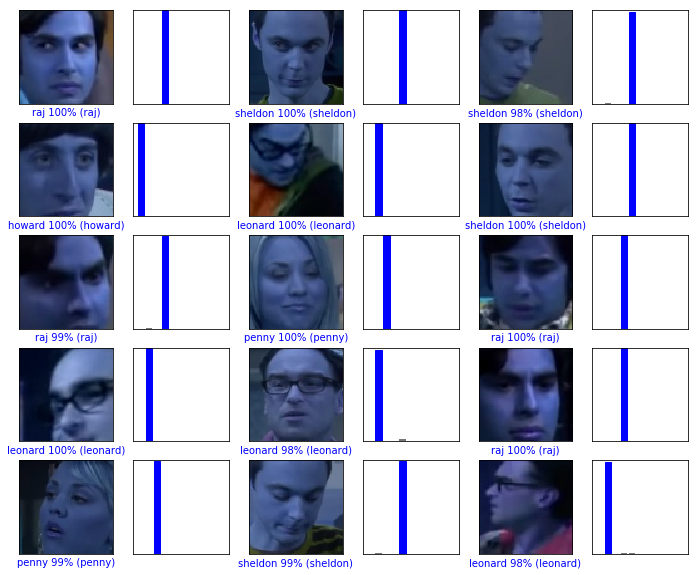

In [46]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [48]:
#time to predict thing hahuahuhahuahuha
#video_capture = cv2.VideoCapture(1)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

while True:
    #ret, frame = video_capture.read()
    frame = grab_screen(region)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, 'Who is this?', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
       
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
#video_capture.release()
cv2.destroyAllWindows()

c:\users\rmauro\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [49]:
#time to predict thing hahuahuhahuahuha
#video_capture = cv2.VideoCapture(1)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2
region                 = (300, 180, 850, 400)

X                      = 0
X2                     = 10
Y                      = 0
Y2                     = 10
width                  = 75
height                 = 75
    
while True:
    #ret, frame = video_capture.read()
    frame = grab_screen(region)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        #prepare image to send to network
        cropped = frame[y : y + h, x : x + w]
        
        resized = cv2.resize(cropped, (width, height), interpolation = cv2.INTER_AREA)
        #normalize it
        normalized = resized / 255.0
        
        # Add the image to a batch where it's the only member.
        batch = (np.expand_dims(normalized,0))

        w, h = width, height
        batch = batch.reshape(batch.shape)

        predictions_single = model.predict(batch)
        

        pred_result = np.argmax(predictions_single)
        
        #print(pred_result)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = '{0} {1:.2f}'.format(str(classes[pred_result]), predictions_single[0][pred_result])
        
        #print(255 * predictions_single[0][pred_result])
        font_color_r = int(255 % (255 * predictions_single[0][pred_result]))
        font_color_b = int(255 * predictions_single[0][pred_result])
        
        cv2.putText(frame, text, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (font_color_b, 0, font_color_r), 2)
        
       
        X = x
        Y = y
        X2 = x + w
        Y2 = y + h
        break
    
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
#video_capture.release()
cv2.destroyAllWindows()

c:\users\rmauro\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [50]:
i = 0.483232323
s = 'is this {0} {1:.2f}?'.format(str(classes[4]), i)
print(s)
print(region)

is this sheldon 0.48?
(300, 180, 850, 400)


In [51]:
predictions = model.predict(test_images)
print('predict', np.argmax(predictions[0]))
print('test label', test_labels[0])

predict 3
test label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
l = np.asarray(['l'])

In [53]:
l.shape

(1,)

In [54]:
labels = ["hellen", "hellen2", "player", "sheldon", "teddy"]

In [55]:
labels[0]

'hellen'

In [179]:
#can we get more testing samples? yes!!!

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

X                      = 0
X2                     = 10
Y                      = 0
Y2                     = 10
width                  = 75
height                 = 75
frame_count            = 1000
threshould             = 270
    
while True:
    #ret, frame = video_capture.read()
    frame_count = frame_count + 1
    
    frame = grab_screen(region)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        #x = x - threshould
        #y = y - threshould
        #w = w + threshould
        #h = h + threshould
        
        #prepare image to send to network
        cropped = gray[y : y + h, x : x + w]
        resized = cv2.resize(cropped, (width, height), interpolation = cv2.INTER_AREA)
        #normalize it
        normalized = resized / 255.0
        
        # Add the image to a batch where it's the only member.
        batch = (np.expand_dims(normalized,0))

        w, h = width, height
        batch = batch.reshape(batch.shape[0], w, h, 1)

        predictions_single = model.predict(batch)

        pred_result = np.argmax(predictions_single)
        
        
        file_name = "b" + str(frame_count) + ".jpg"
        full_path = join(base_dir, "mavbr", classes[pred_result], file_name)
        
        cropped = frame[y:y+h, x:x+w]
        
        cv2.imwrite(full_path, cropped)
        
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, 'is {}?'.format(str(classes[pred_result])), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        
        X = x
        Y = y
        X2 = x + w
        Y2 = y + h
        break
    
    cv2.imshow('video', frame)
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
    
#video_capture.release()
cv2.destroyAllWindows()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
